# OCR and text analysis on pdf files
This notebook uses Optical Character Recognition, using the Pytesseract library, a wrapper for Google's Tesseract OCR engine, which is based upon a long history of text recognition initially developed at Hewlett-Packard. Once made public, Google further developed this for several years as Tesseract, building more libraries to handle over 100 languages, which can be found the documentation: https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html<br>

#### references:
https://www.geeksforgeeks.org/python-reading-contents-of-pdf-using-ocr-optical-character-recognition/



#### more resources:
- [ ] https://pythonhealthcare.org/natural-language-processing/
- [ ] https://www.nltk.org/

#### dependencies:
- pytesseract
- tesseract
- pdf2image
- nltk
- seaborn

## Step 1: load the dedicated env and import libraries
You are looking at this file from GitHub.
## download the folder from github and place on your desktop
Name the folder something simple, like 'OCR'.

### to import and create a new environment
Go to you Anaconda application and in the Environments section, select Import. Select the .yaml file. 

### to activate the environment
Anaconda will install all the libraries and dependencies needed. It should show as activated with a green arrow.

### open the jupyter notebook
In Anaconda, go to the Home section and launch Jupyter Notebook. Once your browser is open, go to your file location and open the notebook. 


In [2]:
# Import libraries
from PIL import Image
import pytesseract
import sys
from pdf2image import convert_from_path
import os

In [3]:
#set working directory - all files will be saved here
import os
os.chdir('/Users/nicolapoppy/Desktop/OCR')
os.getcwd()

'/Users/nicolapoppy/Desktop/OCR'

## Step 2: convert pdf to image files. 
Step 2 can take a while, so best to do one at a time for now...
<br> This will take your multi-page pdf and convert it into a .jpg for each page. 

In [5]:
 
# Path of the pdf
PDF_file = "1.pdf"
  
# Store all the pages of the PDF in a variable
pages = convert_from_path(PDF_file, 500)
  
# Counter to store images of each page of PDF to image
image_counter = 1
  
# Iterate through all the pages stored above
for page in pages:
  
    # Declaring filename for each page of PDF as JPG
    # For each page, filename will be:
    # PDF page 1 -> page_1.jpg
    # PDF page 2 -> page_2.jpg
    # PDF page 3 -> page_3.jpg
    # ....
    # PDF page n -> page_n.jpg
    filename = "page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system
    page.save(filename, 'JPEG')
  
    # Increment the counter to update filename
    image_counter = image_counter + 1
  

/opt/anaconda3/envs/OCR2/lib/python3.8/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (90166175 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


## Step 3: interpreting text from the images using OCR and writing a .txt file

In [6]:

#suppress warnings about image size from PIL
Image.MAX_IMAGE_PIXELS = None   # disables the warning

# Variable to get count of total number of pages
filelimit = image_counter-1
  
# Creating a text file to write the output
outfile = "out_text.txt"
  
# Open the file in append mode so that 
# All contents of all images are added to the same file
f = open(outfile, "a")
  
# Iterate from 1 to total number of pages
for i in range(1, filelimit + 1):
  
    # Set filename to recognize text from
    # These files will be:
    # page_1.jpg
    # page_2.jpg
    # ....
    # page_n.jpg
    filename = "page_"+str(i)+".jpg"
          
    # Recognize the text as string in image using pytesserct
    text = str(((pytesseract.image_to_string(Image.open(filename)))))
  
    # The recognized text is stored in variable text
    # Any string processing may be applied on text
    # Here, basic formatting has been done:
    # In many PDFs, at line ending, if a word can't
    # be written fully, a 'hyphen' is added.
    # The rest of the word is written in the next line
    # Eg: This is a sample text this word here GeeksF-
    # orGeeks is half on first line, remaining on next.
    # To remove this, we replace every '-\n' to ''.
    text = text.replace('-\n', '')    
  
    # Finally, write the processed text to the file.
    f.write(text)
  
# Close the file after writing all the text.
f.close()

print('done - you should see a .txt file in your working directory')

done - you should see a .txt file in your working directory


### woo-hoo! You should see a successfully created .txt file in your folder. 
Now we move on to...
## Step 4: Import NLTK
you can find all the info here: https://www.nltk.org/
- if using this for the first time, a pop-up window from NLTK will appear. 
- select from the corpora tab, the stopwords corpus and download. 
- Once this is complete, you may close the window.

In [7]:
import nltk

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Step 5: NLP from .txt files
First we read in the text file

In [9]:
# file-input.py
f = open('out_text.txt','r')
text = f.read()
print(text)
f.close()

 

Merchants unhappy

Fishermen sell directly to trawlers

by Earle McCurdy

VIRGIN ARM, Nfld.—The scene in Friday Bay off the shores of this small
northern Newfoundland fishing community was unusual to say the least.

About a dozen small, open boats were tied on at the side of a large
Bulgarian freezer trawler waiting to unload their catch of squid while
another similar factory ship was anchored only a few hundred yards away.

The same thing has been happening
in other bays around the island, as an
arrangement between the Newfoundland Fishermen, Food and Allied
Workers (NFFAW) and the Bulgarian
company Ribno Stopanstvo has been
previding a market for millions of
pounds of squid and mackerel caught
by Newfoundland fishermen.

By mid-August, the Bulgarians had
five ships, with a daily capacity
ranging from about 100,000 to
150,000 pounds of fish per boat,
anchored at various points around the
island to buy squid and mackerel from
local fishermen. And plans were afoot

early in September

convert it all to lower case and print the length of the text file

In [10]:
text = text.lower()
print(len(text))

65948


## Step 6: clean out stopwords
This removes stopwords from the text. You can print out the stopwords below if you'd like to see them. 

In [11]:
from nltk.corpus import stopwords # import the stopwords corpus

print(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
text_tokens = nltk.word_tokenize(text)

In [13]:
cleaned_tokens = [] # placeholder for the new tokens
for t in text_tokens:
    if t not in stopwords.words('english'): # check to see if it is in the stopwords corpus. If not, add it.
        cleaned_tokens.append(t) 

print(cleaned_tokens)

['merchants', 'unhappy', 'fishermen', 'sell', 'directly', 'trawlers', 'earle', 'mccurdy', 'virgin', 'arm', ',', 'nfld.—the', 'scene', 'friday', 'bay', 'shores', 'small', 'northern', 'newfoundland', 'fishing', 'community', 'unusual', 'say', 'least', '.', 'dozen', 'small', ',', 'open', 'boats', 'tied', 'side', 'large', 'bulgarian', 'freezer', 'trawler', 'waiting', 'unload', 'catch', 'squid', 'another', 'similar', 'factory', 'ship', 'anchored', 'hundred', 'yards', 'away', '.', 'thing', 'happening', 'bays', 'around', 'island', ',', 'arrangement', 'newfoundland', 'fishermen', ',', 'food', 'allied', 'workers', '(', 'nffaw', ')', 'bulgarian', 'company', 'ribno', 'stopanstvo', 'previding', 'market', 'millions', 'pounds', 'squid', 'mackerel', 'caught', 'newfoundland', 'fishermen', '.', 'mid-august', ',', 'bulgarians', 'five', 'ships', ',', 'daily', 'capacity', 'ranging', '100,000', '150,000', 'pounds', 'fish', 'per', 'boat', ',', 'anchored', 'various', 'points', 'around', 'island', 'buy', 'squi

#### only include alphanumeric characters
This only includes alphabetical characters and does not include numberals, punctuation, or other un-recognized characters. <br>
- [ ] This could be improved to use regex, so that there is the option of keeping numerals

In [14]:
token_words = []
for w in cleaned_tokens:
    if w.isalpha():
        token_words.append(w)
    

In [17]:
token_words

['meanwhile',
 'similar',
 'arrangement',
 'brought',
 'enormous',
 'russian',
 'factory',
 'trawler',
 'loon',
 'bay',
 'also',
 'northern',
 'newfoundland',
 'purchase',
 'pounds',
 'day',
 'two',
 'species',
 'fishermen',
 'real',
 'problems',
 'selling',
 'previous',
 'years',
 'alongside',
 'local',
 'fishing',
 'vessels',
 'range',
 'feet',
 'russian',
 'trawler',
 'looks',
 'like',
 'mount',
 'everest',
 'amidst',
 'gaff',
 'topsails',
 'ton',
 'ship',
 'measures',
 'feet',
 'length',
 'carries',
 'crew',
 'russian',
 'vessel',
 'chartered',
 'swedish',
 'company',
 'entered',
 'contract',
 'nffaw',
 'purchase',
 'metric',
 'tons',
 'squid',
 'mackerel',
 'uic',
 'challenged',
 'simple',
 'error',
 'computer',
 'programmer',
 'ottawa',
 'year',
 'ago',
 'sparked',
 'unprecedented',
 'battle',
 'unemployment',
 'insurance',
 'commission',
 'uic',
 'nova',
 'scotia',
 'claimants',
 'mistake',
 'allowed',
 'people',
 'collect',
 'benefits',
 'raised',
 'legal',
 'moral',
 'politica

### Optional: 
Sometimes, the first section of pages include publisher or journal information that is not useful. You can use the following to remove a set number of words. If this is not needed, you may skip this step.

In [16]:
del token_words[:97]
token_words

['meanwhile',
 'similar',
 'arrangement',
 'brought',
 'enormous',
 'russian',
 'factory',
 'trawler',
 'loon',
 'bay',
 'also',
 'northern',
 'newfoundland',
 'purchase',
 'pounds',
 'day',
 'two',
 'species',
 'fishermen',
 'real',
 'problems',
 'selling',
 'previous',
 'years',
 'alongside',
 'local',
 'fishing',
 'vessels',
 'range',
 'feet',
 'russian',
 'trawler',
 'looks',
 'like',
 'mount',
 'everest',
 'amidst',
 'gaff',
 'topsails',
 'ton',
 'ship',
 'measures',
 'feet',
 'length',
 'carries',
 'crew',
 'russian',
 'vessel',
 'chartered',
 'swedish',
 'company',
 'entered',
 'contract',
 'nffaw',
 'purchase',
 'metric',
 'tons',
 'squid',
 'mackerel',
 'uic',
 'challenged',
 'simple',
 'error',
 'computer',
 'programmer',
 'ottawa',
 'year',
 'ago',
 'sparked',
 'unprecedented',
 'battle',
 'unemployment',
 'insurance',
 'commission',
 'uic',
 'nova',
 'scotia',
 'claimants',
 'mistake',
 'allowed',
 'people',
 'collect',
 'benefits',
 'raised',
 'legal',
 'moral',
 'politica

## Step 7: Stemming or Lemmatization?

There are differences between stemming and lemmatization. <br>
Stemming truncates the endings so that the stem of the word is the same. Such as 'study', 'studies', 'studying'. In this case stud is the stem. The challenge here is that contextual meaning can be easily lost, but it combines all these variations into one stem. Stemming also requires language-specific tools. In this case, we're calling the 'english' library of the snowball stemmer. <br>
#### Stemmer reference: 
https://www.nltk.org/howto/stem.html and <br>
https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658

<br>
Lemmatization on the other hand, takes contextual changes in words from their stems in consideration. This is particularly important for words that have noun/verb changes, such as in 'leaves'. As a noun, its base is 'leaf', but as a verb its 'leave'. <br>
Lemmatization uses dictionaries and different dictionaries are needed with different lanugages. 
#### Lemmatization reference:
https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658 <br>
<br>
Of course, stemming and lemmatization are optional, but they can reduce the number of variations and reduce the amount of terms that are being analyzed. You should try both to see how this may affect your interpretation of topic models. 



### Stemming

In [18]:
#The snowball stemmer is considered to be more effective and accurate than the Porter Stemmer

from nltk.stem import SnowballStemmer 
stemming = SnowballStemmer("english") 


In [19]:
stemmed_list = [stemming.stem(word) for word in token_words]
stemmed_list

['meanwhil',
 'similar',
 'arrang',
 'brought',
 'enorm',
 'russian',
 'factori',
 'trawler',
 'loon',
 'bay',
 'also',
 'northern',
 'newfoundland',
 'purchas',
 'pound',
 'day',
 'two',
 'speci',
 'fishermen',
 'real',
 'problem',
 'sell',
 'previous',
 'year',
 'alongsid',
 'local',
 'fish',
 'vessel',
 'rang',
 'feet',
 'russian',
 'trawler',
 'look',
 'like',
 'mount',
 'everest',
 'amidst',
 'gaff',
 'topsail',
 'ton',
 'ship',
 'measur',
 'feet',
 'length',
 'carri',
 'crew',
 'russian',
 'vessel',
 'charter',
 'swedish',
 'compani',
 'enter',
 'contract',
 'nffaw',
 'purchas',
 'metric',
 'ton',
 'squid',
 'mackerel',
 'uic',
 'challeng',
 'simpl',
 'error',
 'comput',
 'programm',
 'ottawa',
 'year',
 'ago',
 'spark',
 'unpreced',
 'battl',
 'unemploy',
 'insur',
 'commiss',
 'uic',
 'nova',
 'scotia',
 'claimant',
 'mistak',
 'allow',
 'peopl',
 'collect',
 'benefit',
 'rais',
 'legal',
 'moral',
 'polit',
 'question',
 'pay',
 'instanc',
 'provinc',
 'high',
 'unemploy',
 'b

### Lemmatization


In [20]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('omw-1.4')
# Since Lemmatization is based on WordNet's built-in morph function.

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicolapoppy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nicolapoppy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
lemmatizer = WordNetLemmatizer()   
#an instance of Word Net Lemmatizer
#This uses the part-of-speech tag, which preserves verb/noun differences
lemmatized_words_pos = [lemmatizer.lemmatize(word, pos = "v") for word in token_words]
lemmatized_words_pos
#prints POS tagged lemmatized words

['meanwhile',
 'similar',
 'arrangement',
 'bring',
 'enormous',
 'russian',
 'factory',
 'trawler',
 'loon',
 'bay',
 'also',
 'northern',
 'newfoundland',
 'purchase',
 'pound',
 'day',
 'two',
 'species',
 'fishermen',
 'real',
 'problems',
 'sell',
 'previous',
 'years',
 'alongside',
 'local',
 'fish',
 'vessels',
 'range',
 'feet',
 'russian',
 'trawler',
 'look',
 'like',
 'mount',
 'everest',
 'amidst',
 'gaff',
 'topsails',
 'ton',
 'ship',
 'measure',
 'feet',
 'length',
 'carry',
 'crew',
 'russian',
 'vessel',
 'charter',
 'swedish',
 'company',
 'enter',
 'contract',
 'nffaw',
 'purchase',
 'metric',
 'tons',
 'squid',
 'mackerel',
 'uic',
 'challenge',
 'simple',
 'error',
 'computer',
 'programmer',
 'ottawa',
 'year',
 'ago',
 'spark',
 'unprecedented',
 'battle',
 'unemployment',
 'insurance',
 'commission',
 'uic',
 'nova',
 'scotia',
 'claimants',
 'mistake',
 'allow',
 'people',
 'collect',
 'benefit',
 'raise',
 'legal',
 'moral',
 'political',
 'question',
 'pay',

## Join
Let's join the list back togeter into one long thing<br>
the lists may be more effective...

In [22]:
joined_stem_words = ( " ".join(stemmed_list))
joined_stem_words

'meanwhil similar arrang brought enorm russian factori trawler loon bay also northern newfoundland purchas pound day two speci fishermen real problem sell previous year alongsid local fish vessel rang feet russian trawler look like mount everest amidst gaff topsail ton ship measur feet length carri crew russian vessel charter swedish compani enter contract nffaw purchas metric ton squid mackerel uic challeng simpl error comput programm ottawa year ago spark unpreced battl unemploy insur commiss uic nova scotia claimant mistak allow peopl collect benefit rais legal moral polit question pay instanc provinc high unemploy becom way life peopl live comfort live ui benefit peopl accept ui chequ good faith expect return money uic discov made mistak question enorm implic larg bureaucrat organ mistak common might even say inevit present futur claimant ui claimant stash dollar week proverbi mattress anticip day uic discov given much ask repay person live week sudden learn live uic begin deduct o

In [23]:
joined_lemm_words = ( " ".join(lemmatized_words_pos))
joined_lemm_words

'meanwhile similar arrangement bring enormous russian factory trawler loon bay also northern newfoundland purchase pound day two species fishermen real problems sell previous years alongside local fish vessels range feet russian trawler look like mount everest amidst gaff topsails ton ship measure feet length carry crew russian vessel charter swedish company enter contract nffaw purchase metric tons squid mackerel uic challenge simple error computer programmer ottawa year ago spark unprecedented battle unemployment insurance commission uic nova scotia claimants mistake allow people collect benefit raise legal moral political question pay instance province high unemployment become way life people live comfortably live ui benefit people accept ui cheque good faith expect return money uic discover make mistake question enormous implications large bureaucratic organization mistake common might even say inevitable present future claimants ui claimant stash dollars week proverbial mattress a

In [24]:
joined_token_words = ( " ".join(token_words))
joined_token_words

'meanwhile similar arrangement brought enormous russian factory trawler loon bay also northern newfoundland purchase pounds day two species fishermen real problems selling previous years alongside local fishing vessels range feet russian trawler looks like mount everest amidst gaff topsails ton ship measures feet length carries crew russian vessel chartered swedish company entered contract nffaw purchase metric tons squid mackerel uic challenged simple error computer programmer ottawa year ago sparked unprecedented battle unemployment insurance commission uic nova scotia claimants mistake allowed people collect benefits raised legal moral political questions pay instances province high unemployment become way life people live comfortably live ui benefits people accept ui cheques good faith expected return money uic discovers made mistake question enormous implications large bureaucratic organization mistakes common might even say inevitable present future claimants ui claimant stashing

In [25]:
#save out these as text files for further analysis
with open("joined_token_words_"+ PDF_file + ".txt", "w") as output:
    output.write(str(joined_token_words))
    
with open("joined_lemm_words_"+ PDF_file + ".txt", "w") as output:
    output.write(str(joined_lemm_words))
    
with open("joined_stem_words_"+ PDF_file + ".txt", "w") as output:
    output.write(str(joined_stem_words))
    

## Step 8: Visualizing frequencies


#### check frequency
This will create a list of the 100 most common tokens

In [26]:
freq = nltk.FreqDist(lemmatized_words_pos)

print(freq.most_common(100))

[('government', 54), ('people', 48), ('asbestos', 48), ('workers', 43), ('newfoundland', 39), ('health', 38), ('company', 35), ('union', 35), ('right', 33), ('indians', 33), ('uic', 31), ('issue', 31), ('mine', 31), ('make', 29), ('one', 29), ('verte', 27), ('baie', 27), ('claim', 26), ('work', 24), ('board', 23), ('atlantic', 22), ('would', 22), ('also', 21), ('service', 21), ('land', 21), ('year', 20), ('federal', 20), ('labrador', 20), ('province', 19), ('ee', 19), ('act', 19), ('dust', 19), ('money', 18), ('state', 18), ('strike', 18), ('canada', 18), ('advocate', 18), ('could', 17), ('years', 16), ('local', 16), ('since', 16), ('level', 16), ('provincial', 16), ('unemployment', 15), ('nova', 15), ('take', 15), ('new', 15), ('legislation', 15), ('scotia', 14), ('per', 14), ('employees', 14), ('include', 14), ('interest', 14), ('indian', 14), ('two', 13), ('fishermen', 13), ('commission', 13), ('go', 13), ('group', 13), ('miners', 13), ('limit', 13), ('squid', 12), ('say', 12), ('ag

## more visual resources
https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

In [39]:
import seaborn as sns
import pandas as p
import matplotlib.pyplot as plt

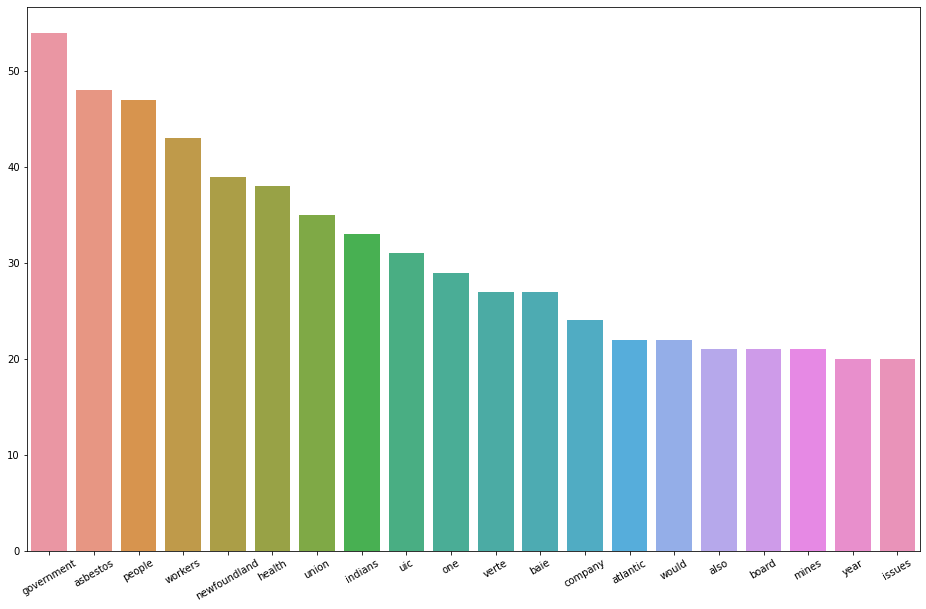

government      54
asbestos        48
people          47
workers         43
newfoundland    39
health          38
union           35
indians         33
uic             31
one             29
verte           27
baie            27
company         24
atlantic        22
would           22
also            21
board           21
mines           21
year            20
issues          20
dtype: int64

In [40]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(token_words).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(16,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

plt.savefig("top_20_tokens_from_" + PDF_file + ".png")
plt.show()

all_fdist.to_csv("top_20_tokens_from_" + PDF_file + ".csv")
all_fdist

## that's it!
You get the following from this notebook that can be used for further analysis:
- all_fdist.csv for the top twenty most frequent words
- all_fdist.png bar chart showing the top twenty most frequent words 
- joined word lists for the tokens, stemmed tokens, and lemmatized tokens as the text of the entire document saved as a continuous text
- the out.txt which is the original, unmodified text as interpreted by the OCR engine. This preserves the original structure and may be useful in certain analysis. 
<br>
<br>
Further analysis can compare the terms found in this article to others and rank them in importance, such as TF-IDF. Or the documents can be analyzed for topics and those topics compared against other documents using LDA with Spacey and Gensim. 